In [ ]:
# Extract keyords and important topics
# Wordcloud to show the ones that occur the most often
# Visualizations between employee title, tenure, department and the rating t

In [ ]:
# Heatmap on a map of the world for grades by location
# Extract the top N positives and negative points that come up in reviews

In [ ]:
# General sentiment about the company - different segments of the employee population.

# > What are the segments of people we are interested in? Everyone? Mangers and up?
# > What do we want to know about them? How they feel about the company
# > Why do they feel that way? - Topic Extraction and Clustering
# > How has this changed through time? Were people giving better reviews in 2018?

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Import dataset
df = pd.read_csv("Data.csv", index_col = 0)
df.head()

,Title,Rating,Employee_Status,Pros,Cons,Date_Posted,Employee_Title,Location,Unnamed: 9
0,Great Culture and Company That Cares,4,Current Employee,Not much politics and very few ego's. Everyone...,Need to focus on career growth and promoting w...,13-Jan-21,Senior Corporate Recruiter in Troy,MI,NaN
1,Shaping the Future of Mobility!,5,"Current Employee, more than 1 year","Global Work Environment, Cutting Edge Technolo...",None to mention at this time.,14-Apr-21,Program Manager in Dublin,Dublin,NaN
2,Lots of potential- getting there,4,"Current Employee, more than 1 year",A very fast paced environment - you definitely...,Training and coaching could be better- high ex...,22-May-21,SCM in Dublin,Dublin,NaN
3,Alright but not the best,3,"Current Employee, more than 1 year","Excellent office, good staff, good pay, good b...","Dis organised, office politics at mid/top leve...",08-Mar-21,Business Analyst in Dublin,Dublin,NaN
4,Aptiv,3,Current Employee,It is one of the leaders in the automotive ind...,"High pressure for hitting numbers, it is more ...",07-Nov-20,Supply Chain in Dublin,Dublin,NaN


### Preprocessing
        Text cleaning and preprocessing before analysis

In [4]:
# Convert reviews to string format
df['Pros'] = df['Pros'].astype(str)
df['Cons'] = df['Cons'].astype(str)

In [5]:
#Drop any null values
df = df[~df["Pros"].isnull()]
df = df[~df["Cons"].isnull()]


In [6]:
# Combine the different review columns
def combined_features(row):
    return row['Title'] + ' '+ row['Pros'] + ' '+ row['Cons']
df['all_features'] = df.apply(combined_features, axis=1)
df.head()

,Title,Rating,Employee_Status,Pros,Cons,Date_Posted,Employee_Title,Location,Unnamed: 9,all_features
0,Great Culture and Company That Cares,4,Current Employee,Not much politics and very few ego's. Everyone...,Need to focus on career growth and promoting w...,13-Jan-21,Senior Corporate Recruiter in Troy,MI,NaN,Great Culture and Company That Cares Not much ...
1,Shaping the Future of Mobility!,5,"Current Employee, more than 1 year","Global Work Environment, Cutting Edge Technolo...",None to mention at this time.,14-Apr-21,Program Manager in Dublin,Dublin,NaN,Shaping the Future of Mobility! Global Work En...
2,Lots of potential- getting there,4,"Current Employee, more than 1 year",A very fast paced environment - you definitely...,Training and coaching could be better- high ex...,22-May-21,SCM in Dublin,Dublin,NaN,Lots of potential- getting there A very fast p...
3,Alright but not the best,3,"Current Employee, more than 1 year","Excellent office, good staff, good pay, good b...","Dis organised, office politics at mid/top leve...",08-Mar-21,Business Analyst in Dublin,Dublin,NaN,"Alright but not the best Excellent office, goo..."
4,Aptiv,3,Current Employee,It is one of the leaders in the automotive ind...,"High pressure for hitting numbers, it is more ...",07-Nov-20,Supply Chain in Dublin,Dublin,NaN,Aptiv It is one of the leaders in the automoti...


### Data Analysis

In [31]:
# Adding the length of the review and the word count of each review
df['review_len'] = df['all_features'].astype(str).apply(len)
df['word_count'] = df['all_features'].apply(lambda x: len(str(x).split()))
df['Pros_len'] = df['Pros'].astype(str).apply(len)
df['Cons_len'] = df['Cons'].astype(str).apply(len)

In [32]:
# Use textblob library to check for polarity
# Counts positive and negative words and determines the polarity (-1, 1)
from textblob import TextBlob, Word, Blobber
df['polarity'] = df['all_features'].map(lambda text: TextBlob(text).sentiment.polarity)
df.head()

,Title,Rating,Employee_Status,Pros,Cons,Date_Posted,Employee_Title,Location,Unnamed: 9,all_features,review_len,word_count,polarity,Pros_len,Cons_len
0,Great Culture and Company That Cares,4,Current Employee,Not much politics and very few ego's. Everyone...,Need to focus on career growth and promoting w...,13-Jan-21,Senior Corporate Recruiter in Troy,MI,NaN,Great Culture and Company That Cares Not much ...,342,58,0.193286,173,131
1,Shaping the Future of Mobility!,5,"Current Employee, more than 1 year","Global Work Environment, Cutting Edge Technolo...",None to mention at this time.,14-Apr-21,Program Manager in Dublin,Dublin,NaN,Shaping the Future of Mobility! Global Work En...,141,20,-0.025000,79,29
2,Lots of potential- getting there,4,"Current Employee, more than 1 year",A very fast paced environment - you definitely...,Training and coaching could be better- high ex...,22-May-21,SCM in Dublin,Dublin,NaN,Lots of potential- getting there A very fast p...,531,89,0.188991,379,118
3,Alright but not the best,3,"Current Employee, more than 1 year","Excellent office, good staff, good pay, good b...","Dis organised, office politics at mid/top leve...",08-Mar-21,Business Analyst in Dublin,Dublin,NaN,"Alright but not the best Excellent office, goo...",160,25,0.616667,53,81
4,Aptiv,3,Current Employee,It is one of the leaders in the automotive ind...,"High pressure for hitting numbers, it is more ...",07-Nov-20,Supply Chain in Dublin,Dublin,NaN,Aptiv It is one of the leaders in the automoti...,300,53,0.100278,85,208


array([[<AxesSubplot:title={'center':'review_len'}>,
        <AxesSubplot:title={'center':'word_count'}>],
       [<AxesSubplot:title={'center':'polarity'}>, <AxesSubplot:>]],
      dtype=object)

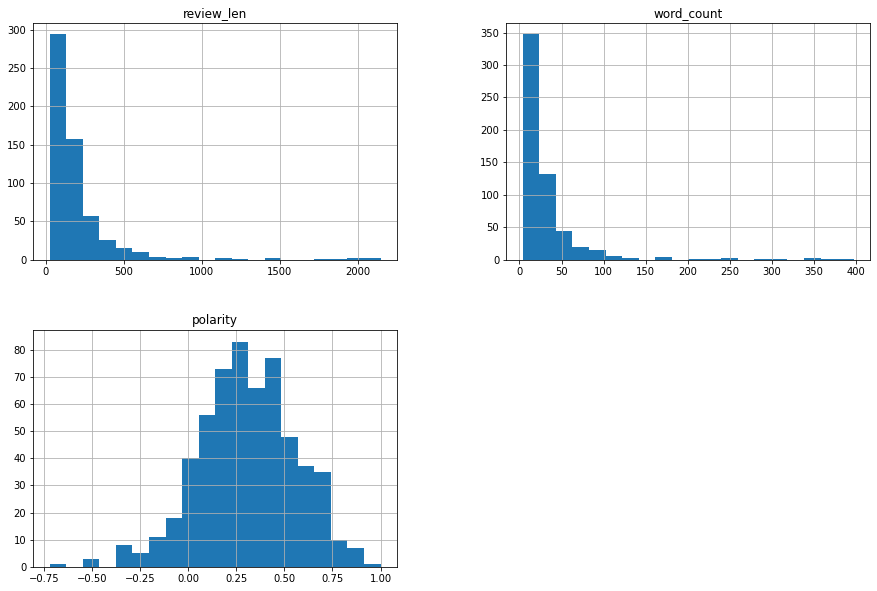

In [9]:
# Distribution of the word count, review lengh and polarity
df[["review_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))

# Distribution of review length and word count is similar
# Majority polarity is above 0 - more reviews have a positive sentiment

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

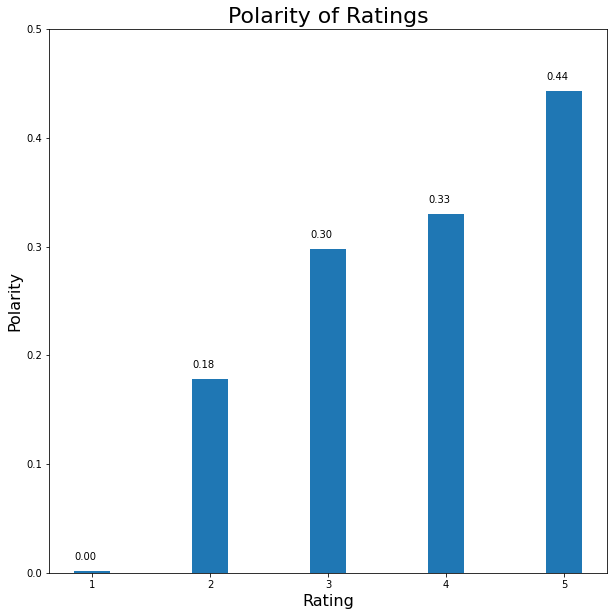

In [11]:
# Mean polarity keeps going up with the higher rating
mean_pol = df.groupby('Rating')['polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(mean_pol.index, mean_pol.mean_polarity, width=0.3)
#plt.gca().set_xticklabels(mean_pol.index, fontdict={'size': 14})
    
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str("{:.2f}".format(i.get_height())))
plt.title("Polarity of Ratings", fontsize=22)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.ylim(0, 0.5)
plt.show()

# ower ratings still not near -1

In [12]:
import seaborn as sns

Rectangle(xy=(-0.4, 0), width=0.8, height=209, angle=0)
209
Rectangle(xy=(0.6, 0), width=0.8, height=145, angle=0)
145
Rectangle(xy=(1.6, 0), width=0.8, height=118, angle=0)
118
Rectangle(xy=(2.6, 0), width=0.8, height=58, angle=0)
58
Rectangle(xy=(3.6, 0), width=0.8, height=49, angle=0)
49


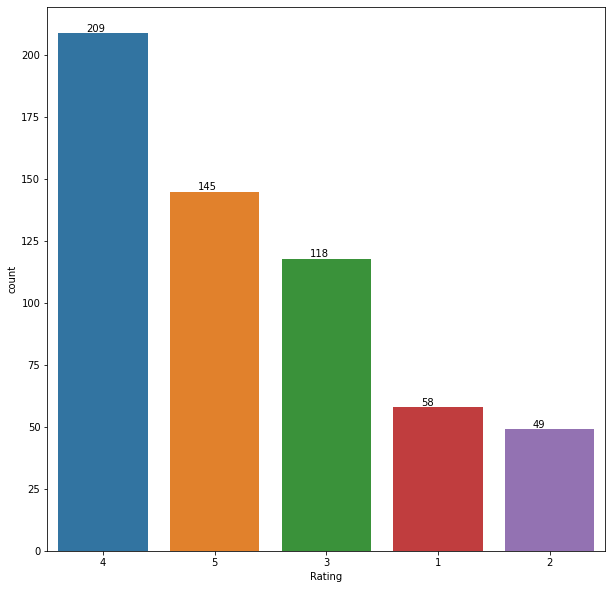

In [13]:
# Count of the reviews for each rating
# Most reviews have a rating of 4
plt.figure(figsize=(10,10))

ax = sns.countplot(x=df['Rating'], data=df, order=df['Rating'].value_counts().index)
for p, label in zip(ax.patches, df['Rating'].value_counts()):
    print(p)
    print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

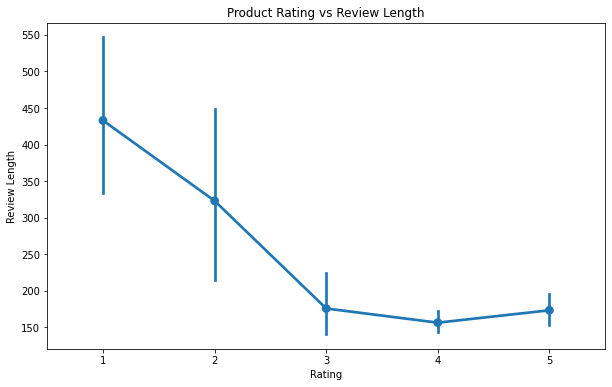

In [14]:
# Length of the review vs the rating
# Check of the review length changes with rating
# Hogher ratings have shorter reviews
plt.figure(figsize=(10, 6))
sns.pointplot(x = "Rating", y = "review_len", data = df)
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.title("Product Rating vs Review Length")
plt.show()

In [15]:
mask = (df['Rating'] == 1) | (df['Rating'] == 2)
df_rating_12 = df[mask]
mask = (df['Rating'] == 4) | (df['Rating'] == 5) | (df['Rating'] == 3)
df_rating_345 = df[mask]

In [16]:
print(len(df_rating_12))
print(len(df_rating_345))

107
472


In [123]:
# Average rating by year

### Positive and Negative Reveiw Comparsion

c:\users\xj30hh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\xj30hh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


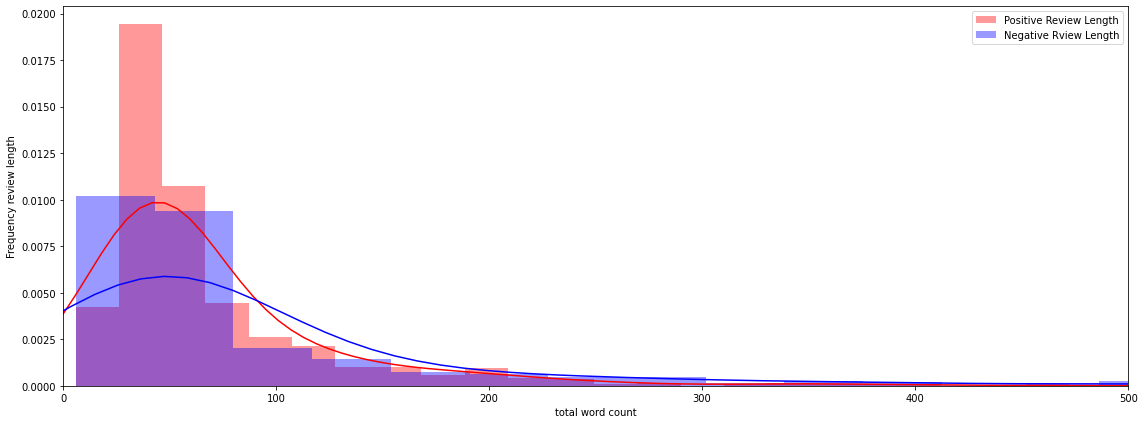

In [124]:
fig, ax = plt.subplots(figsize=(16, 6), tight_layout=True)

sns.distplot(df.Pros_len, color="red", label='Positive Review Length')
sns.distplot(df.Cons_len, color='blue', label='Negative Rview Length')
ax.legend()
ax.set(xlabel='total word count', ylabel='Frequency review length')
plt.xlim(0, 500)
plt.show()



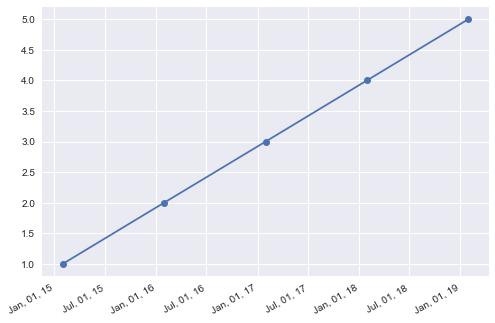

In [137]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

dates = [
            datetime(2015, 1, 30), 
            datetime(2016, 1, 30), 
            datetime(2017, 1, 30), 
            datetime(2018, 1, 30), 
            datetime(2019, 1, 30)
    ]

y = [1, 2, 3, 4, 5]

plt.plot_date(dates, y, linestyle='solid')

plt.gcf().autofmt_xdate()

date_format = mpl_dates.DateFormatter('%b, %d, %y')

plt.gca().xaxis.set_major_formatter(date_format)







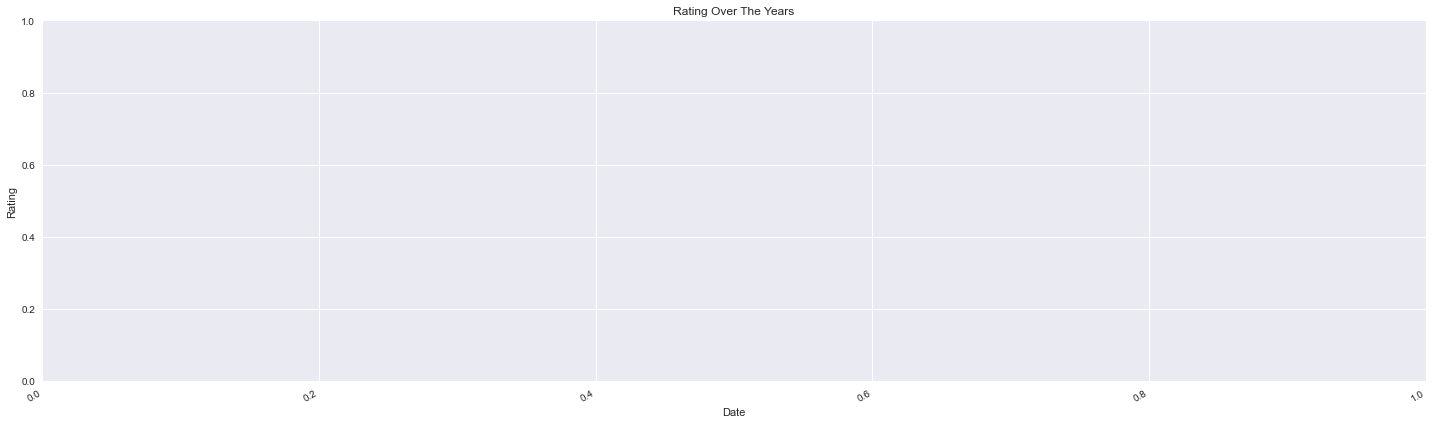

In [164]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

fig, ax = plt.subplots(figsize=(20, 6), tight_layout=True)

plt.style.use('seaborn')

# df['Date_Posted'] = pd.to_datetime( df['Date_Posted'])
# df.sort_values('Date_Posted', inplace=True)

df.index = pd.to_datetime(df['Date_Posted'],format='%m/%d/%y %I:%M%p')
df.groupby(by=[df.index.month, df.index.year])

df.groupby(pd.Grouper(freq='M'))

review_date = df['Date_Posted']
rating = df['Rating']

#plt.bar(review_date, rating, linestyle='wide')

plt.gcf().autofmt_xdate()

plt.title('Rating Over The Years')
plt.xlabel('Date')
plt.ylabel('Rating')

plt.tight_layout()

plt.show()





